<a href="https://colab.research.google.com/github/gustavor10silva/CNN-Pedra-Papel-Tesoura/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from functools import partial
%matplotlib inline

# 1 Baixando os arquivos

* Todos os arquivos utilizados neste notebook estão em uma pasta do Google Drive: https://drive.google.com/drive/folders/1fOlvsLwOrPyX42Ovm_6z9JR723mBdepj?usp=sharing

* O Google Colab está conectado ao meu Drive. Portanto, os modelos salvos tem um diretório de lá. Para baixar os modelos no formato .h5, basta acessar o link acima.

* O dataset a ser utilizado durante todo esse notebook é o seguinte: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors

* Primeiro, baixamos os arquivos .zip contendo os dados de treino e de teste:

In [ ]:
# 'rps.zip' contém os dados de treino e será salvo no diretório temporário ‘/tmp/rps.zip’:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip 

# 'rps-test-set.zip' contém os dados de teste e será salvo no diretório temporário ‘/tmp/rps-test-set.zip’
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip 

--2021-08-19 22:03:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.213.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   128MB/s    in 1.5s    

2021-08-19 22:03:32 (128 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-08-19 22:03:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/

# 2 Descompactando os arquivos

O próximo passo é descompactar os arquivos .zip que baixamos:

In [ ]:
import os # o módulo 'os' serve para trabalharmos com arquivos
import zipfile # a biblioteca zipfile permite manipular arquivos .zip 

local_zip = '/tmp/rps.zip' # informamos o diretório onde está o arquivo .zip que baixamos
zip_ref = zipfile.ZipFile(local_zip, 'r') # local_zip é o caminho do arquivo e o modo 'r' significa 'read' - queremos ler o arquivo
zip_ref.extractall('/tmp/') # extrai todos os arquivos de zip_ref e grava-os no diretório '/tmp/'
zip_ref.close() # fecha o arquivo zip_ref. Você deve chamar close() antes de sair do seu programa ou registros essenciais não serão gravados

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Para entender melhor onde estão esses arquivos e qual é a estrutura do diretório onde estão sendo descompactados, basta abrir este notebook no Google Colaboratory, compilar todas as células até aqui e clicar em:
* '/tmp/rps/', para acessar a pasta com os dados de treino;
* '/tmp/rps-test-set/', para acessar a pasta com os dados de teste.

Em cada um desses caminhos, teremos 3 pastas: 'rock', 'paper' e 'scissors'. Cada uma contendo as imagens rotuladas das mãos. A seguir, construiremos vetores com os nomes de todos os arquivos e visualizaremos a quantidade de imagens rotuladas, no conjunto de treino:

In [ ]:
rock_files = os.listdir('/tmp/rps/rock') # definimos 'rock_files' como um vetor com todos os nomes dos arquivos da pasta 'rock'
paper_files = os.listdir('/tmp/rps/paper')
scissors_files = os.listdir('/tmp/rps/scissors')

print('total training rock images:', len(rock_files)) # apenas para visualizarmos o tamanho do vetor 'rock_files'
print('total training paper images:', len(paper_files))
print('total training scissors images:', len(scissors_files))

print(rock_files[:10]) # para visualizarmos as 10 primeiras entradas do vetor 'rock_files'
print(paper_files[:10])
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-084.png', 'rock07-k03-068.png', 'rock03-041.png', 'rock05ck01-111.png', 'rock03-070.png', 'rock07-k03-005.png', 'rock06ck02-000.png', 'rock07-k03-077.png', 'rock04-101.png', 'rock04-067.png']
['paper04-025.png', 'paper01-071.png', 'paper03-055.png', 'paper04-076.png', 'paper02-007.png', 'paper05-106.png', 'paper07-096.png', 'paper05-024.png', 'paper04-081.png', 'paper04-080.png']
['scissors02-033.png', 'testscissors02-026.png', 'scissors01-060.png', 'testscissors02-008.png', 'scissors01-092.png', 'scissors01-096.png', 'testscissors01-060.png', 'testscissors03-068.png', 'testscissors03-119.png', 'scissors03-073.png']


Note que temos 840 imagens de cada uma das três categorias, totalizando 2520 imagens de treino. 

Podemos construir a mesma visualização geral do conjunto de teste, como segue:

In [ ]:
test_rock_files = os.listdir('/tmp/rps-test-set/rock')
test_paper_files = os.listdir('/tmp/rps-test-set/paper')
test_scissors_files = os.listdir('/tmp/rps-test-set/scissors')

print('total test rock images:', len(test_rock_files)) # apenas para visualizarmos o tamanho do vetor 'rock_files'
print('total test paper images:', len(test_paper_files))
print('total test scissors images:', len(test_scissors_files))

print(test_rock_files[:10]) # para visualizarmos as 10 primeiras entradas do vetor 'rock_files'
print(test_paper_files[:10])
print(test_scissors_files[:10])

total test rock images: 124
total test paper images: 124
total test scissors images: 124
['testrock02-03.png', 'testrock02-11.png', 'testrock04-16.png', 'testrock02-25.png', 'testrock03-03.png', 'testrock03-19.png', 'testrock02-06.png', 'testrock03-09.png', 'testrock04-10.png', 'testrock04-11.png']
['testpaper04-07.png', 'testpaper02-08.png', 'testpaper03-27.png', 'testpaper04-30.png', 'testpaper03-22.png', 'testpaper02-12.png', 'testpaper03-06.png', 'testpaper01-01.png', 'testpaper04-21.png', 'testpaper01-07.png']
['testscissors01-07.png', 'testscissors01-22.png', 'testscissors02-28.png', 'testscissors02-14.png', 'testscissors01-00.png', 'testscissors04-01.png', 'testscissors01-08.png', 'testscissors02-11.png', 'testscissors02-01.png', 'testscissors04-09.png']


Assim, vemos que o conjunto de testes possui 124 imagens de cada uma das 3 categorias, totalizando 372 imagens de teste.

# 3 Visualizando as imagens

Primeiro, importamos as bibliotecas que usaremos para plotar as imagens:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Podemos plotar uma imagem especificando o caminho assim:

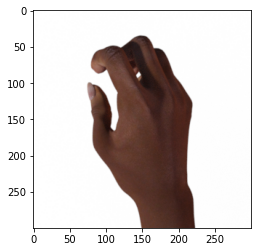

In [ ]:
img = mpimg.imread('/tmp/rps/rock/rock02-042.png')
plt.imshow(img)
plt.axis('On')
plt.show()

Ou podemos plotar várias imagens em conjunto:

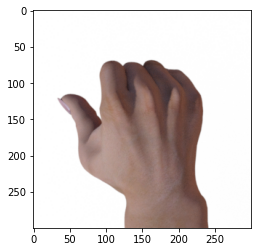

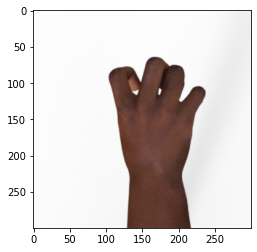

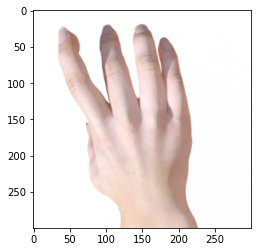

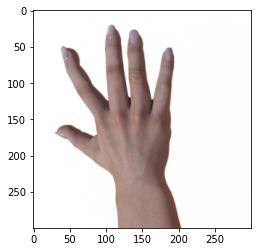

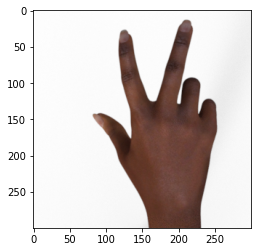

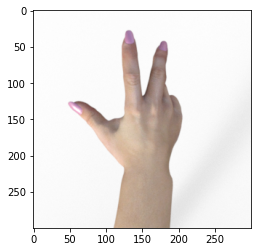

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('On')
  plt.show()

# 4 Trabalhando sem data augmentation

Nesta seção, vamos criar um modelo e treiná-lo usando os dados de treino originais - sem fazer o aumento de dados.

Em seguida, repetiremos todo o processo usando o aumento de dados e detalhando mais cada procedimento.

A intenção é compararmos a diferença entre o treinamento com e sem o aumento de dados, uma vez que essa técnica é utilizada para reduzir o overfitting do modelo.

Dito isso, vamos gerar o conjunto de treino:

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = "/tmp/rps/" # esse é o diretório dos dados de treinamento
initial_training_datagen = ImageDataGenerator(rescale = 1./255) # normalizando os valores (as intensidades de pixel vão passar de [0,255] para [0,1])

initial_train_generator = initial_training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150), # depois da etapa de data augmentation, queremos que as imagens tenham dimensão 150
	class_mode='categorical', # as classes são categorias ('rock', 'paper' ou 'scissor')
)

Found 2520 images belonging to 3 classes.


Agora, vamos gerar o conjunto de validação. O procedimento é idêntico:

In [ ]:
VALIDATION_DIR = "/tmp/rps-test-set/" # esse é o diretório dos dados de treinamento
initial_validation_datagen = ImageDataGenerator(rescale = 1./255) # normalizando os valores (as intensidades de pixel vão passar de [0,255] para [0,1])

initial_validation_generator = initial_validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150), # depois da etapa de data augmentation, queremos que as imagens tenham dimensão 150
	class_mode='categorical', # as classes são categorias ('rock', 'paper' ou 'scissor')
)

Found 372 images belonging to 3 classes.


Agora, vamos construir o modelo que será utilizado. Chamaremos ele de $initial\_model$:

In [ ]:
initial_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

A próxima etapa é compilar a rede neural que criamos:

In [ ]:
initial_model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Agora, vamos ao treinamento do modelo:

In [ ]:
initial_history = initial_model.fit(initial_train_generator, epochs=25, steps_per_epoch=20, validation_data = initial_validation_generator, verbose = 1)

Epoch 1/25
20/20 [==============================] - 57s 3s/step - loss: 1.7904 - accuracy: 0.3938 - val_loss: 1.1442 - val_accuracy: 0.4032
Epoch 2/25
20/20 [==============================] - 53s 3s/step - loss: 0.5357 - accuracy: 0.7859 - val_loss: 0.9910 - val_accuracy: 0.5457
Epoch 3/25
20/20 [==============================] - 53s 3s/step - loss: 0.1965 - accuracy: 0.9234 - val_loss: 0.8577 - val_accuracy: 0.7124
Epoch 4/25
20/20 [==============================] - 53s 3s/step - loss: 0.1065 - accuracy: 0.9641 - val_loss: 1.1878 - val_accuracy: 0.6989
Epoch 5/25
20/20 [==============================] - 53s 3s/step - loss: 0.0892 - accuracy: 0.9609 - val_loss: 0.7864 - val_accuracy: 0.8468
Epoch 6/25
20/20 [==============================] - 53s 3s/step - loss: 0.0934 - accuracy: 0.9609 - val_loss: 1.2449 - val_accuracy: 0.5968
Epoch 7/25
20/20 [==============================] - 53s 3s/step - loss: 0.0422 - accuracy: 0.9858 - val_loss: 1.5465 - val_accuracy: 0.7769
Epoch 8/25
20/20 [==

Finalizado o treinamento, podemos visualizar o desempenho do modelo no treinamento:

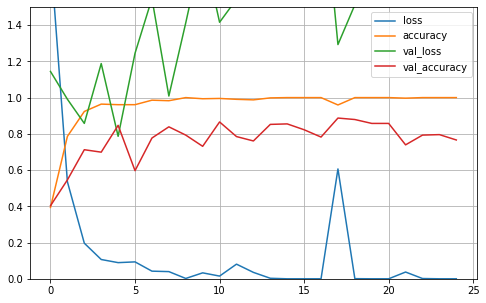

In [ ]:
pd.DataFrame(initial_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

In [ ]:
initial_model.evaluate(initial_train_generator)

79/79 [==============================] - 49s 613ms/step - loss: 6.2735e-06 - accuracy: 1.0000


[6.2734961829846725e-06, 1.0]

In [ ]:
initial_model.evaluate(initial_validation_generator)

12/12 [==============================] - 7s 588ms/step - loss: 2.7333 - accuracy: 0.7661


[2.7333385944366455, 0.7661290168762207]

No gráfico acima e nas avaliações feitas em seguida, vemos que o loss nos dados de treino ficou praticamente nulo ao fim do treinamento. Além disso, a acurácia nos dados de treino atingiu cerca de 100% com apenas algumas épocas.

Por outro lado, nos dados de validação, temos um loss muito maior e uma acurácia de 76,6%.

Isso nos diz que o modelo sofreu overfitting, ou seja, se ajustou perfeitamente aos dados de treino, mas não conseguiu generalizar bem para dados de fora do conjunto de treino.

Uma alternativa para solucionar esse problema é usar data augmentation nas imagens de treino. Faremos isso a seguir e usaremos o mesmo modelo para treinar com esses novos dados. Assim, veremos a diferença que faz essa técnica.

Antes de prosseguirmos, salvemos o modelo:

In [ ]:
initial_model.save("initial_model_rps.h5")

Um arquivo chamado initial_model_rps.h5 será gerado em Arquivos > content, dentro do próprio Google Colab. Devemos baixar esse arquivo para podermos utilizar o modelo posteriormente, pois quando o ambiente do Colab é desconectado, ele exclui os arquivos salvos nos seus diretórios temporários.

Depois de salvar o modelo e fazer o download dele, temos duas alternativas:
* quando necessário, fazer o upload manualmente exatamente no mesmo local: Arquivos > content. Dessa forma, quando precisarmos carregar o modelo, basta compilarmos o código: keras.models.load_model('initial_model_rps.h5');

* fazer o upload do arquivo no seu próprio drive e integrar o drive ao Google Colab (foi o que eu fiz). Esse vídeo explica: https://www.youtube.com/watch?v=sbOnV78uoys&ab_channel=Programa%C3%A7%C3%A3oDin%C3%A2mica

# 5 Preparando os dados de treino e validação - com data augmentation

Agora, vamos preparar os dados de treino e validação para podermos usar no treinamento da rede convolucional. Primeiro, importamos algumas bibliotecas a serem usadas: $tensorflow$, $keras$ e $ImageDataGenerator$:

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## 5.1 Preparando os dados de treino

* Para preparar os dados de treinamento, tomamos as imagens originais e usamos a biblioteca $ImageDataGenerator$ para gerar lotes de imagens com data augmentation (aumento de dados) em tempo real - essas imagens serão geradas durante o treinamento;

* É possível fazer o aumento de dados antes do treino. A desvantagem disso é ser mais trabalhoso; a vantagem é deixar o treino mais rápido;

* Para fazer o aumento de dados, definimos alguns parâmetros que serão usados para aplicar transformações aleatórias nas imagens, o que produzirá novas imagens que irão compor o dataset de treino;

* Cada transformação aplicada está comentada na célula de código seguinte. Todas as transformações possíveis e a explicação de cada uma encontra-se na documentação abaixo;

* Documentação sobre $ImageDataGenerator$: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
TRAINING_DIR = "/tmp/rps/" # esse é o diretório dos dados de treinamento
training_datagen = ImageDataGenerator(
      rescale = 1./255, # normalizando os valores (as intensidades de pixel vão passar de [0,255] para [0,1])
	    rotation_range=40, # intervalo de rotações aleatórias das imagens, dado em graus
      width_shift_range=0.2, # intervalo de mudança aleatória na largura. Nesse caso, são possíveis valores flutuantes em (-0.2, 0.2]
      height_shift_range=0.2, # intervalo de mudança aleatória na altura. 
      shear_range=0.2, # ângulo máximo de cisalhamento no sentido anti-horário em graus
      zoom_range=0.2, # intervalo de zoom aleatório. Nesse caso, o intervalo é [1 - 0.2, 1 + 0.2] = [0.8, 1.2]
      horizontal_flip=True, # inverte aleatoriamente as entradas horizontais (espelhamento horizontal)
      fill_mode='nearest') # como são preenchidos pontos fora dos limites da entrada. Possíveis: '{"constant", "nearest", "reflect", "wrap"}

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150), # depois da etapa de data augmentation, queremos que as imagens tenham dimensão 150
	class_mode='categorical', # as classes são categorias ('rock', 'paper' ou 'scissor')
  batch_size=126 # serão feitos batches com 126 imagens; o treinamento é feito com esses batches
)

Found 2520 images belonging to 3 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
pic = load_img('/tmp/rps/paper/paper01-000.png')
pic.getpixel

<bound method Image.getpixel of <PIL.Image.Image image mode=RGB size=300x300 at 0x7F013751CE50>>

In [ ]:
pic_array = img_to_array(pic)
pic_array.shape

(300, 300, 3)

In [ ]:
pic_array = pic_array.reshape((1,)+pic_array.shape)
pic_array.shape

(1, 300, 300, 3)

In [ ]:
count = 0
for batch in training_datagen.flow(pic_array, batch_size=5, save_to_dir = '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation', save_prefix='testinho', save_format='jpeg'):
  count += 1
  if count == 10:
    break

In [ ]:
for pic in ['/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_1073.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_1342.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_1571.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_2540.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_3140.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_3266.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_7189.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_8043.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_8664.jpeg', '/content/drive/MyDrive/Colab_Datasets/plot_img_data_generation/testinho_0_9981.jpeg']
img = mpimg.imread('/tmp/rps/rock/rock02-042.png')
plt.imshow(img)
plt.axis('On')
plt.show()

SyntaxError: ignored

## 5.2 Preparando os dados de validação

Agora, resta gerar o conjunto de validação. Note que os dados de validação serão somente normalizados - porque os dados de treino foram normalizados - e devem estar no mesmo formato dos dados de treino, no que refere-se a:
* dimensão ($target\_size$);
* tipo de classe ($class\_mode$);
* tamanho do lote ($batch\_size$).

In [ ]:
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255) # os dados de validação são somente normalizados

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150), # dimensão das imagens de validação
	class_mode='categorical', # as classes das imagens de validação são do tipo categoria (rock, paper e scissor)
  batch_size=126 # o lote terá tamanho 126, ou seja, cada lote terá 126 imagens
)

Found 372 images belonging to 3 classes.


# 6 Construção da rede neural convolucional

Finalmente, vamos à criação da rede neural convolucional que classificará as imagens. Para isso, usaremos o modelo sequencial do keras:

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Com o comando $.summary()$, podemos ver a estrutura do modelo. Note que ele é composto por:

* 4 conjuntos de convolução + pooling (criar feature maps e reduzir a dimensão das imagens);
* 1 camada de flattening (comprimir as imagens em um único vetor para dar entrada na rede neural densa);
* 1 camada de dropout (evitar o overfitting da rede neural densa);
* 1 camada densa com 512 neurônios;
* 1 camada densa de saída com 3 neurônios (porque temos 3 classes possíveis).

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

Agora, vamos compilar o modelo. Nessa parte, definimos o loss, o otimizador a ser utilizado no treinamento e a métrica que usaremos para avaliar o desempenho do modelo:

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 7 Treinamento da rede neural convolucional

Agora, treinaremos o modelo com os dados gerados a partir do processo de data augmentation. Os dados de validação também são utilizados nessa etapa. Mas antes disso, vamos falar dos hiperparâmetros $steps\_per\_epoch$ e $validation\_steps$, que devem ser definidos antes do treinamento.

## 7.1 Hiperparâmetro $steps\_per\_epoch$

* O treinamento é dividido em várias épocas e o número de épocas é um hiperparâmetro que definimos antes do treinamento;
* Em cada época, o otimizador RMSProp atua em um único lote (definimos o tamanho do lote como 126, então cada lote armazena 126 imagens de treino);
* Em uma situação ótima, queremos que em cada época o otimizador use todos os dados de treino para corrigir os parâmetros do modelo, então ele precisa realizar um número suficiente de iterações;
* O número de iterações do otimizador é o número de etapas por época $steps\_per\_epoch$. Então definimos:
$steps\_per\_epoch = k \cdot int\left(\dfrac{train\_length}{ batch\_size}\right)$, onde $\begin{cases} k=1, \text{se não aumentamos os dados}\\ k\geq1, \text{caso contrário}\end{cases}$

* No nosso caso, temos:
$steps\_per\_epoch = k \cdot int\left(\dfrac{3 \cdot 840}{126}\right) = k \cdot 20$

* Vamos tomar $k=1$ inicialmente, mas como aumentamos os dados, isso não será suficiente para o RMSProp iterar com todos os dados de treino em cada época. Então, posteriormente, vamos incrementar o $k$ para notar a diferença;

* Fórum sobre $steps\_per\_epoch$: https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch

* Explicação sobre o estocástico gradiente descendente (que é idêntica para o RMSProp e os demais otimizadores que atuam em lotes) (pg. 24): https://ele.ufes.br/sites/engenhariaeletrica.ufes.br/files/field/anexo/kaio_g_utsch.pdf



## 7.2 Hiperparâmetro $validation\_steps$

* Em cada época, o modelo passará pelo treinamento e pela validação;
* Na parte de treinamento, já vimos como definir o hiperparâmetro $steps\_per\_epoch$ para que o treinamento use todos os dados de treino em cada época;
* Nesse sentido, o hiperparâmetro $validation\_steps$ funciona exatamente como o $steps\_per\_epoch$, a única diferença é que ele refere-se aos dados de validação;
* Dito isso, em cada época - na parte de validação - também queremos que a validação ocorra levando em conta todos os dados de validação, não somente alguns;
* Como a validação é feita por lotes, se definirmos $validation\_steps = 1$, depois do treino de cada época, o modelo será avaliado em um único lote e prosseguirá para a próxima época;
* Dessa forma, para que a validação ocorra levando em conta todos os dados de validação, simplesmente definimos:
$validation\_steps = int\left(\dfrac{validation\_length}{batch\_size}\right)$
* No nosso caso, temos:
$validation\_steps = int\left(\dfrac{372}{126}\right) = 3$
* Fórum sobre $validation\_steps$: https://stackoverflow.com/questions/45943675/meaning-of-validation-steps-in-keras-sequential-fit-generator-parameter-list

## 7.3 Treinamento

Agora, antes de treinarmos o modelo, vamos entender brevemente cada um dos hiperparâmetros que serão usados:

* $train\_generator$: os dados de treino que produzimos com data augmentation;
* $epochs=25$: o treinamento terá 25 épocas;
* $steps\_per\_epoch=20$: cada época de treinamento terá 20 steps;
* $validation\_data$: os dados de validação que produzimos (eles estão somente normalizados e nas mesmas dimensões dos dados de treino);
* $verbose=1$: a quantidade de informações que queremos ter sobre o treinamento. É um número natural. Quanto maior, mais informações teremos;
* $validation\_steps=3$: cada validação terá 3 steps, ou seja, em cada época o modelo será validado em 3 lotes de tamanho 126, o que significa $3\cdot 126 = 378$ imagens do conjunto de validação. Como o conjunto de validação só tem 372 imagens, o lote será completado com mais 6 imagens, que ficarão duplicadas.

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 196s 10s/step - loss: 1.2819 - accuracy: 0.3456 - val_loss: 1.0895 - val_accuracy: 0.3548
Epoch 2/25
20/20 [==============================] - 194s 10s/step - loss: 1.0946 - accuracy: 0.3591 - val_loss: 1.0913 - val_accuracy: 0.3952
Epoch 3/25
20/20 [==============================] - 192s 10s/step - loss: 1.1356 - accuracy: 0.4206 - val_loss: 1.0495 - val_accuracy: 0.5780
Epoch 4/25
20/20 [==============================] - 191s 9s/step - loss: 0.9497 - accuracy: 0.5452 - val_loss: 2.9525 - val_accuracy: 0.3629
Epoch 5/25
20/20 [==============================] - 192s 10s/step - loss: 0.9316 - accuracy: 0.6044 - val_loss: 0.6558 - val_accuracy: 0.7715
Epoch 6/25
20/20 [==============================] - 189s 9s/step - loss: 0.6922 - accuracy: 0.6988 - val_loss: 0.2481 - val_accuracy: 0.9919
Epoch 7/25
20/20 [==============================] - 192s 10s/step - loss: 0.6813 - accuracy: 0.7143 - val_loss: 0.4227 - val_accuracy: 0.7957
Epoch 8/

Finalizado o treinamento, salvamos o modelo para não precisar treiná-lo novamente da próxima vez que formos usá-los para fazer previsões:

In [ ]:
model.save('model_rps.h5')

In [ ]:
model_rps = keras.models.load_model('/content/drive/MyDrive/Colab_Datasets/model_rps.h5')

Com o código a seguir, podemos visualizar o desempenho do modelo durante as épocas de treinamento, levando em conta o loss e a acurácia, tanto no conjunto de treino, quanto no conjunto de validação:

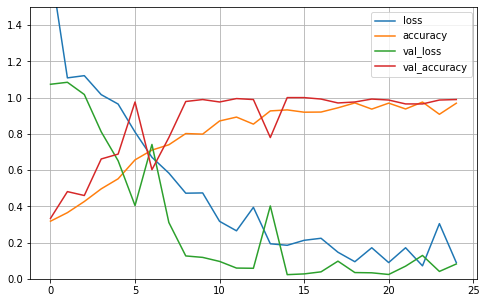

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

In [ ]:
model_rps.evaluate(train_generator)

20/20 [==============================] - 61s 3s/step - loss: 0.0447 - accuracy: 0.9833


[0.044657815247774124, 0.9833333492279053]

In [ ]:
model_rps.evaluate(validation_generator)

3/3 [==============================] - 7s 2s/step - loss: 0.1710 - accuracy: 0.9409


[0.17103062570095062, 0.9408602118492126]

Com o gráfico acima e as avaliações, podemos notar o seguinte:

* No conjunto de treinamento, tanto o loss quanto a acurácia foram piores do que no primeiro modelo, onde não usamos data augmentation;
* Por outro lado, no conjunto de validação, o modelo performou significativamente melhor quando usamos o aumento de dados no conjunto de treino, a acurácia melhorou quase 20%, passando de 76% para 94%.

# 8 Previsões com o modelo criado

* Anteriormente, fizemos a avaliação do modelo no conjunto de treinamento e no conjunto de validação. Embora isso dê uma noção da performance do modelo, não é o certo a se fazer.

* O correto é avaliar o modelo em imagens que não estavam no conjunto de treino e nem no conjunto de validação. Isso fornece uma noção realista da capacidade de classificação do modelo.

* Para isso, nesta seção faremos previsões com fotos tiradas por mim, por meus familiares e pela minha namorada - fotos da mão de cada um fazendo os gestos de pedra, papel e tesoura.

* Nos dois casos, os modelos serão avaliados pela acurácia e usando uma matriz de confusão, para entendermos onde eles estão errando. Demais métricas de avaliação podem ser usadas pelo scikit learn, conforme o link https://scikit-learn.org/stable/modules/model_evaluation.html.

## 8.1 Criando o conjunto de testes

A seguinte linha de código importará as bibliotecas que usaremos para fazer o upload das imagens e criará um botão que permite o upload de arquivos:

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
uploaded = files.upload()

Saving paper1.jpeg to paper1.jpeg
Saving paper2.jpeg to paper2.jpeg
Saving paper3.jpeg to paper3.jpeg
Saving paper4.jpeg to paper4.jpeg
Saving paper5.jpeg to paper5.jpeg
Saving paper6.jpeg to paper6.jpeg
Saving paper7.jpeg to paper7.jpeg
Saving paper8.jpeg to paper8.jpeg
Saving paper9.jpeg to paper9.jpeg
Saving paper10.jpeg to paper10.jpeg
Saving paper11.jpeg to paper11.jpeg
Saving paper12.jpeg to paper12.jpeg
Saving paper13.jpeg to paper13.jpeg
Saving paper14.jpeg to paper14.jpeg
Saving paper15.jpeg to paper15.jpeg
Saving paper16.jpeg to paper16.jpeg
Saving paper17.jpeg to paper17.jpeg
Saving paper18.jpeg to paper18.jpeg
Saving paper19.jpeg to paper19.jpeg
Saving paper20.jpeg to paper20.jpeg
Saving paper21.jpeg to paper21.jpeg
Saving paper22.jpeg to paper22.jpeg
Saving paper23.jpeg to paper23.jpeg
Saving paper24.jpeg to paper24.jpeg
Saving paper25.jpeg to paper25.jpeg
Saving paper26.jpeg to paper26.jpeg
Saving paper27.jpeg to paper27.jpeg
Saving paper28.jpeg to paper28.jpeg
Saving pap

Podemos plotar algumas imagens usando o comando Image(). 

Como as fotos foram tiradas na proporção 1:1, definindo a largura da imagem como 150 veremos as imagens no mesmo formato em que o modelo as usará para fazer as previsões:

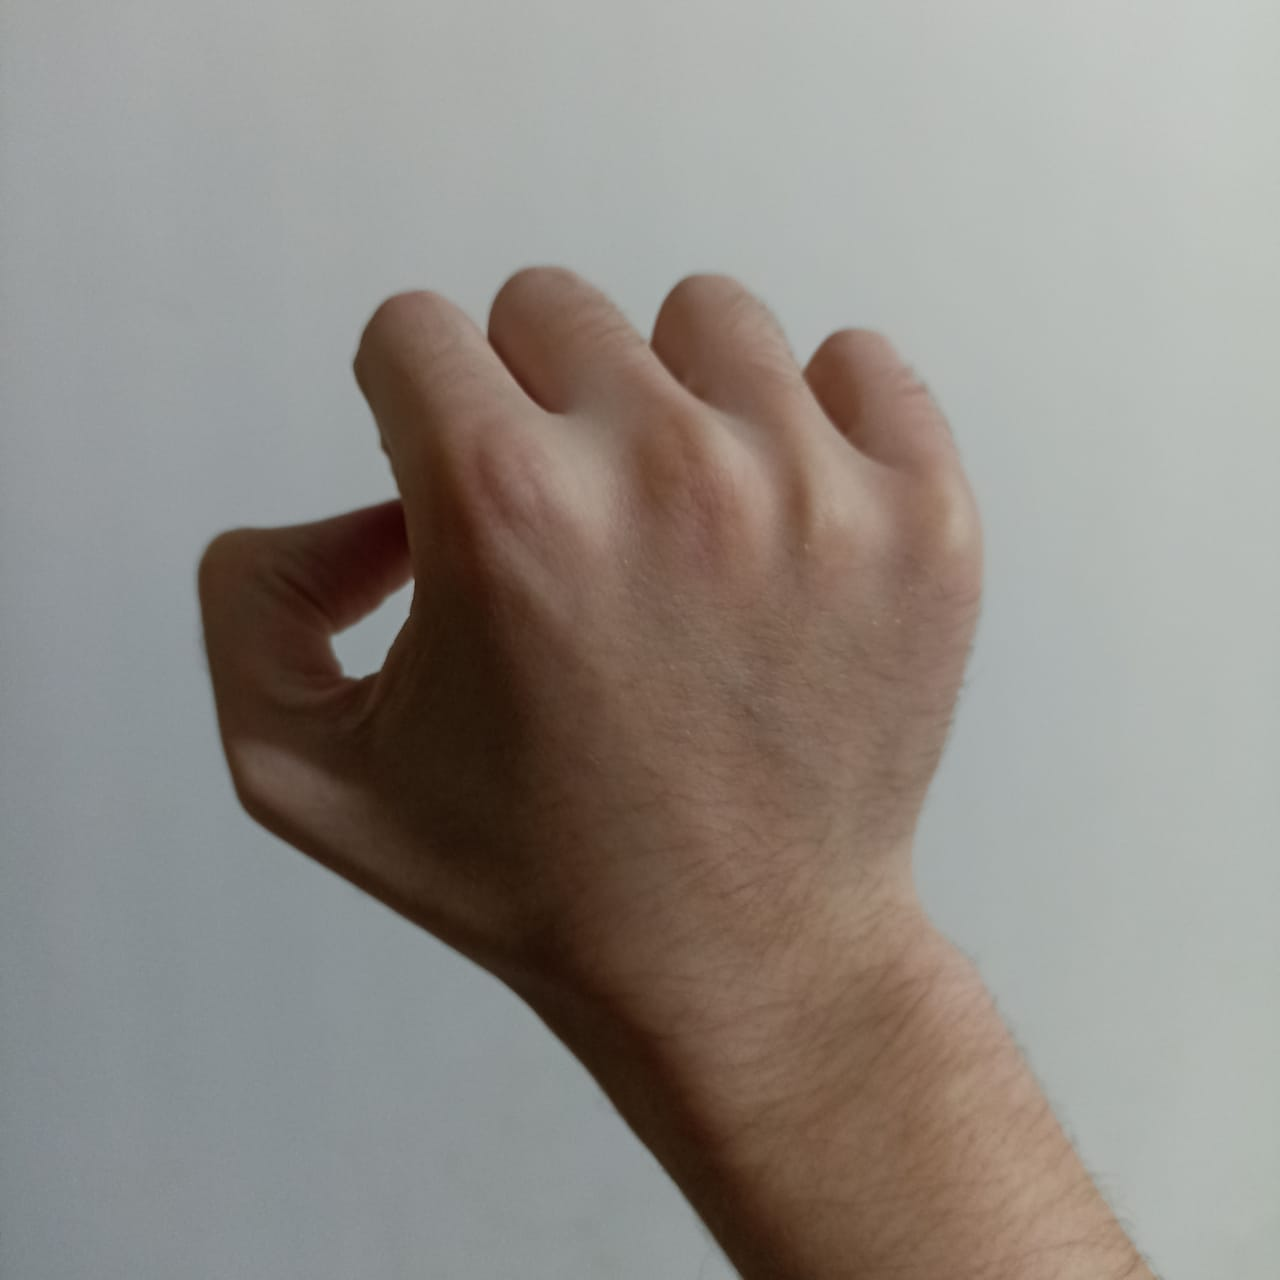

In [ ]:
Image('rock8.jpeg', width=150)

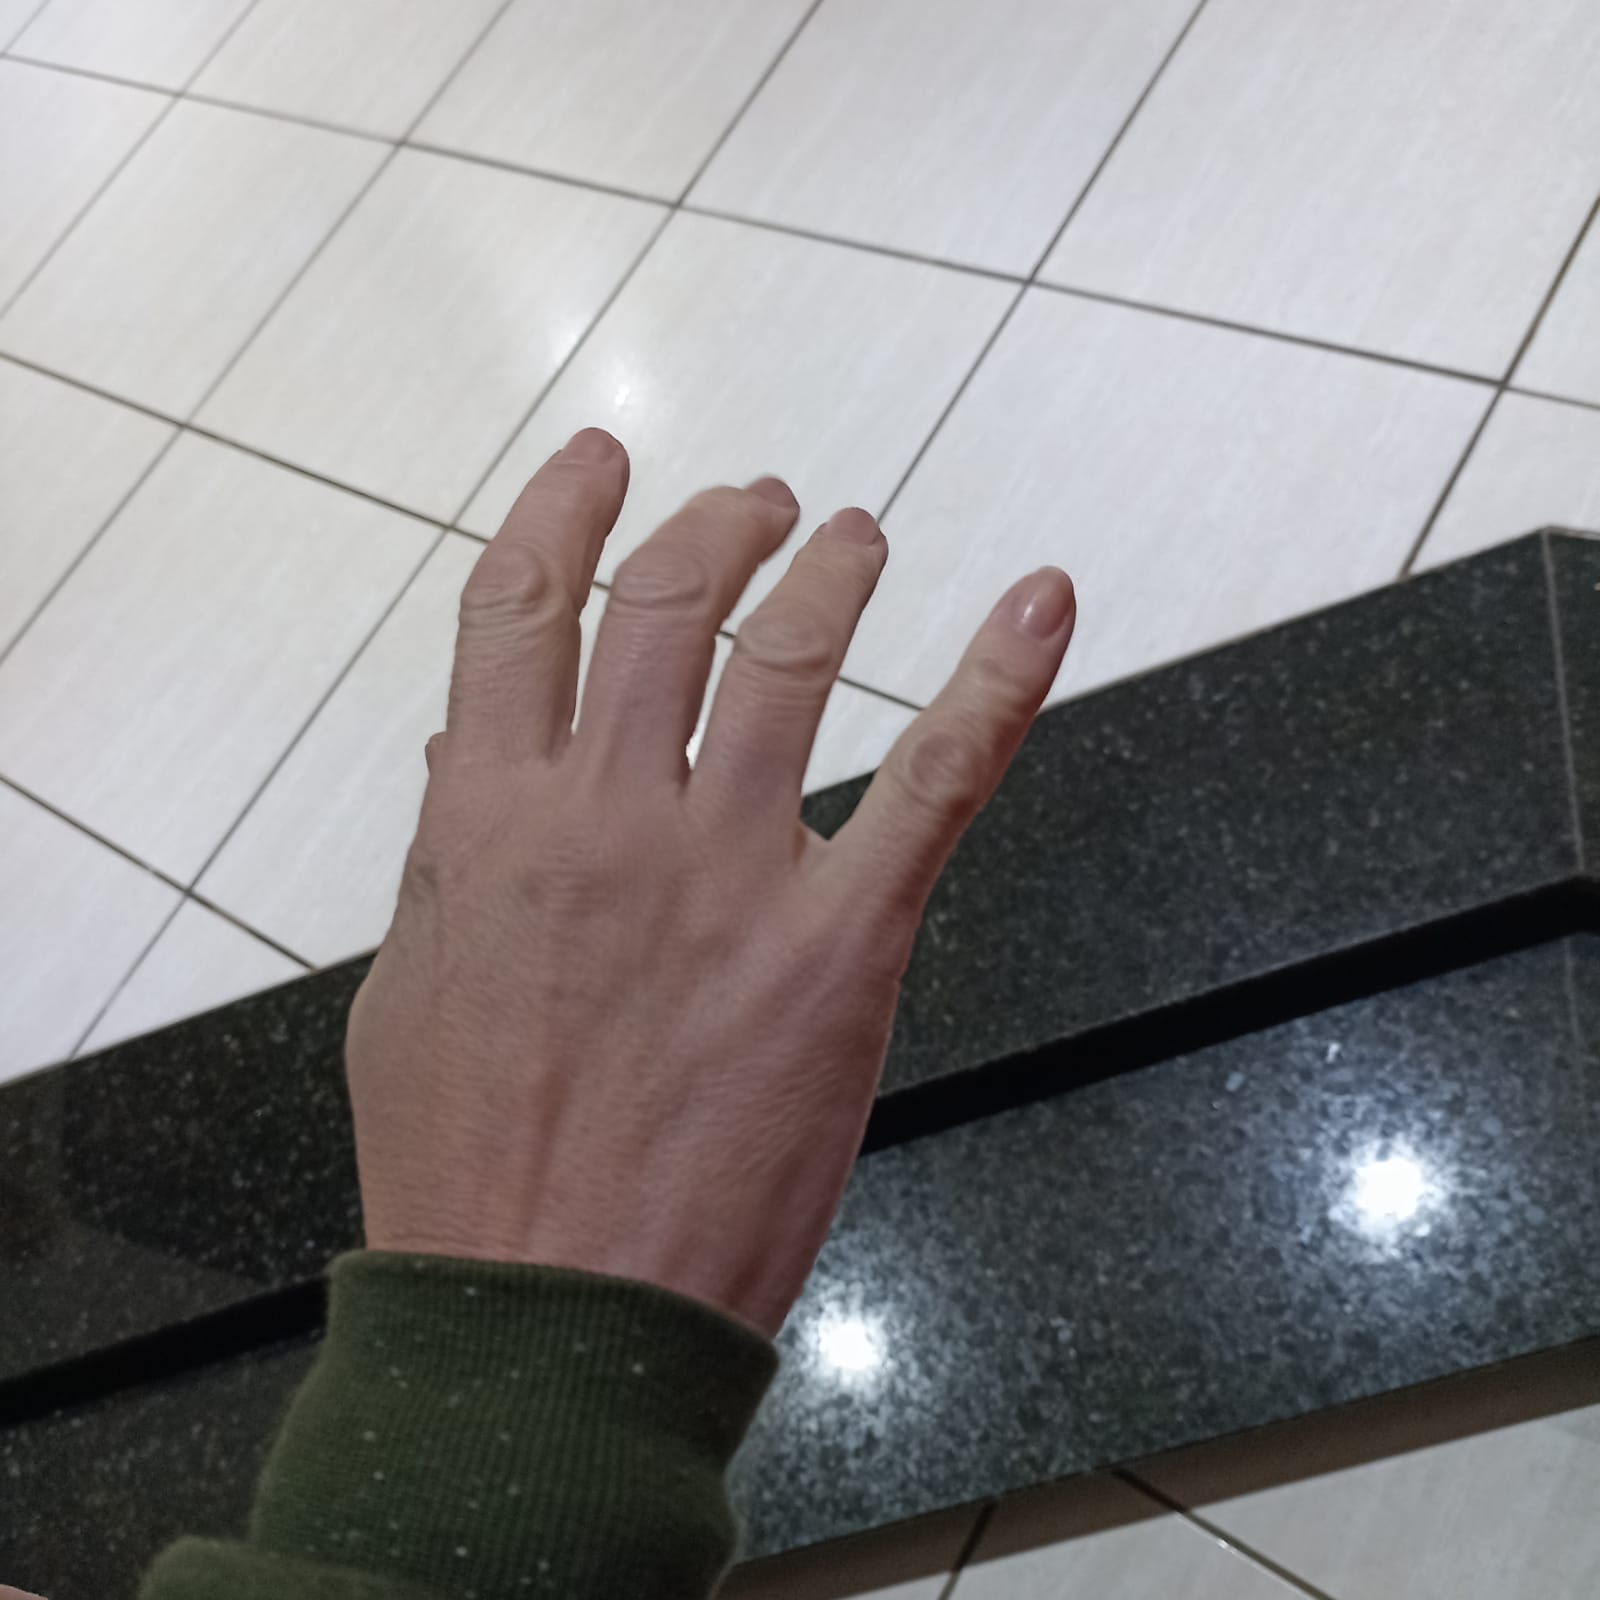

In [ ]:
Image('paper47.jpeg', width=150)

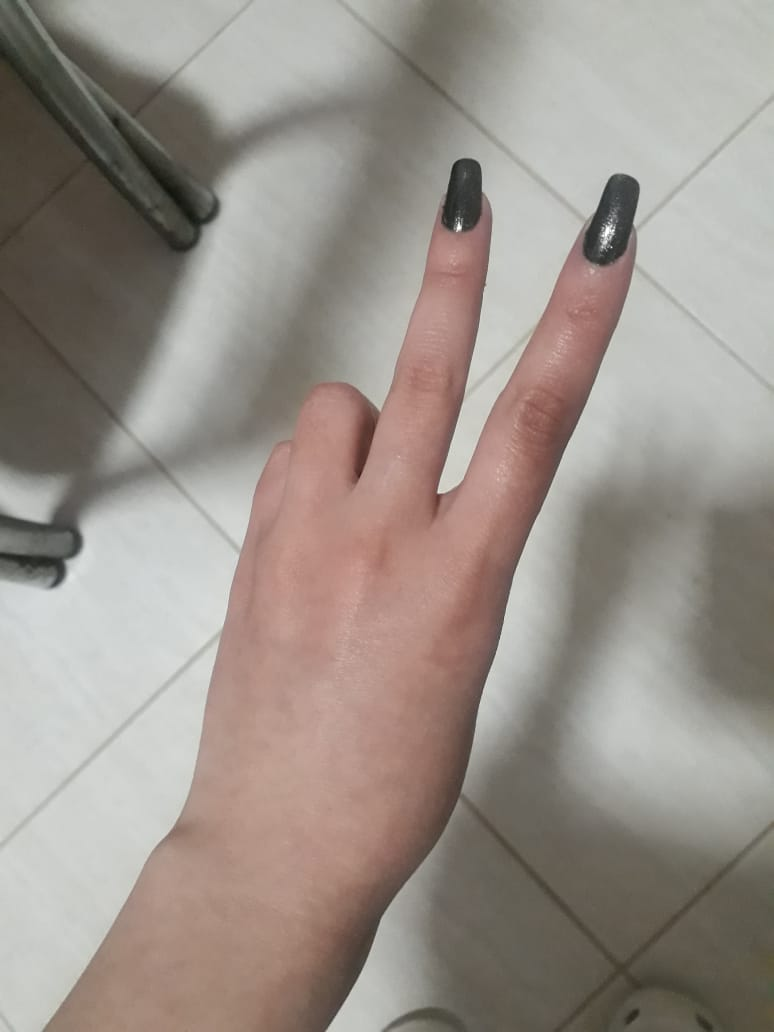

In [ ]:
Image('scissors11.jpeg', width=150)

Por fim, vamos criar uma lista com os rótulos reais das imagens de teste:

In [ ]:
labels = []
for nome in uploaded.keys():
  if ('paper' in nome):
    labels.append(1)
  if ('rock' in nome):
    labels.append(2)
  if ('scissors' in nome):
    labels.append(3)

## 8.2 Previsões sem data augmentation

Feito o upload das imagens, no código seguinte, o modelo sem data augmentation fará as previsões com o $.predict()$

As previsões retornadas serão na forma de triplas, onde o número 1 representará a classe que o modelo deu como resposta, seguindo a ordem: ['paper', 'rock', 'scissors'].

In [ ]:
initial_model_rps = keras.models.load_model("/content/drive/MyDrive/Colab_Datasets/initial_model_rps.h5")

In [ ]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = initial_model_rps.predict(images, batch_size=10)
  print(fn)
  print(classes)

paper1.jpeg
[[1. 0. 0.]]
paper2.jpeg
[[1. 0. 0.]]
paper3.jpeg
[[1. 0. 0.]]
paper4.jpeg
[[1. 0. 0.]]
paper5.jpeg
[[1. 0. 0.]]
paper6.jpeg
[[1. 0. 0.]]
paper7.jpeg
[[1. 0. 0.]]
paper8.jpeg
[[1. 0. 0.]]
paper9.jpeg
[[1. 0. 0.]]
paper10.jpeg
[[1. 0. 0.]]
paper11.jpeg
[[0. 0. 1.]]
paper12.jpeg
[[0. 0. 1.]]
paper13.jpeg
[[0. 1. 0.]]
paper14.jpeg
[[0. 1. 0.]]
paper15.jpeg
[[0. 1. 0.]]
paper16.jpeg
[[1. 0. 0.]]
paper17.jpeg
[[1. 0. 0.]]
paper18.jpeg
[[1. 0. 0.]]
paper19.jpeg
[[1. 0. 0.]]
paper20.jpeg
[[1. 0. 0.]]
paper21.jpeg
[[1. 0. 0.]]
paper22.jpeg
[[1. 0. 0.]]
paper23.jpeg
[[1. 0. 0.]]
paper24.jpeg
[[1. 0. 0.]]
paper25.jpeg
[[1. 0. 0.]]
paper26.jpeg
[[3.5208245e-27 0.0000000e+00 1.0000000e+00]]
paper27.jpeg
[[1. 0. 0.]]
paper28.jpeg
[[1. 0. 0.]]
paper29.jpeg
[[0. 0. 1.]]
paper30.jpeg
[[1. 0. 0.]]
paper31.jpeg
[[1. 0. 0.]]
paper32.jpeg
[[1. 0. 0.]]
paper33.jpeg
[[1. 0. 0.]]
paper34.jpeg
[[1. 0. 0.]]
paper35.jpeg
[[1. 0. 0.]]
paper36.jpeg
[[1. 0. 0.]]
paper37.jpeg
[[1. 0. 0.]]
paper38.jpeg
[

Agora, vamos calcular a acurácia do modelo:

In [ ]:
k = 0
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = initial_model_rps.predict(images, batch_size=10)
  #print(fn)
  #print(classes)
  if ('paper' in fn) and (round(classes[0][0]) == 1):
    k = k + 1
  if ('rock' in fn) and (round(classes[0][1]) == 1):
    k = k + 1
  if ('scissors' in fn) and (round(classes[0][2]) == 1):
    k = k + 1
print('Acurácia =', k/len(uploaded.keys()))

Acurácia = 0.5133333333333333


Feito isso, vamos gerar uma lista com os rótulos preditos pelo modelo, para podermos construir a matriz de confusão:

In [ ]:
k = 0
initial_predict = []
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  if ([int(x) for x in initial_model_rps.predict(images, batch_size=10).tolist()[0]]) == [1,0,0]:
    initial_predict.append(1)
  if ([int(x) for x in initial_model_rps.predict(images, batch_size=10).tolist()[0]]) == [0,1,0]:
    initial_predict.append(2)
  if ([int(x) for x in initial_model_rps.predict(images, batch_size=10).tolist()[0]]) == [0,0,1]:
    initial_predict.append(3)
#initial_predict

Finalmente, vamos analisar os resultados com uma matriz de confusão:

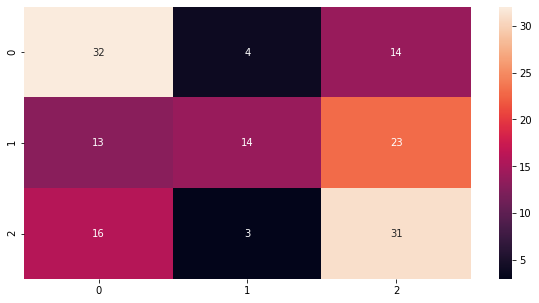

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matriz_confusao = confusion_matrix(labels, initial_predict)
plt.figure(figsize=(10,5))
sns.heatmap(matriz_confusao, annot=True)

## 8.3 Previsões com data augmentation

Primeiro, vamos carregar o modelo que treinamos com data augmentation:

In [ ]:
model_rps = keras.models.load_model('/content/drive/MyDrive/Colab_Datasets/model_rps.h5')

Vamos fazer as previsões com o modelo:

In [ ]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_rps.predict(images, batch_size=10)
  print(fn)
  print(classes)

paper1.jpeg
[[0. 0. 1.]]
paper2.jpeg
[[1.000000e+00 0.000000e+00 6.769857e-29]]
paper3.jpeg
[[0. 0. 1.]]
paper4.jpeg
[[1. 0. 0.]]
paper5.jpeg
[[1. 0. 0.]]
paper6.jpeg
[[1. 0. 0.]]
paper7.jpeg
[[9.241505e-31 0.000000e+00 1.000000e+00]]
paper8.jpeg
[[1. 0. 0.]]
paper9.jpeg
[[1. 0. 0.]]
paper10.jpeg
[[1. 0. 0.]]
paper11.jpeg
[[1. 0. 0.]]
paper12.jpeg
[[1. 0. 0.]]
paper13.jpeg
[[1. 0. 0.]]
paper14.jpeg
[[1. 0. 0.]]
paper15.jpeg
[[1. 0. 0.]]
paper16.jpeg
[[1. 0. 0.]]
paper17.jpeg
[[1. 0. 0.]]
paper18.jpeg
[[1.3547523e-09 0.0000000e+00 1.0000000e+00]]
paper19.jpeg
[[1. 0. 0.]]
paper20.jpeg
[[1. 0. 0.]]
paper21.jpeg
[[1. 0. 0.]]
paper22.jpeg
[[1. 0. 0.]]
paper23.jpeg
[[1.00000e+00 0.00000e+00 5.76749e-12]]
paper24.jpeg
[[1. 0. 0.]]
paper25.jpeg
[[1. 0. 0.]]
paper26.jpeg
[[1. 0. 0.]]
paper27.jpeg
[[1.0000000e+00 0.0000000e+00 1.2195274e-30]]
paper28.jpeg
[[1. 0. 0.]]
paper29.jpeg
[[1. 0. 0.]]
paper30.jpeg
[[1. 0. 0.]]
paper31.jpeg
[[1. 0. 0.]]
paper32.jpeg
[[1. 0. 0.]]
paper33.jpeg
[[1. 0. 0.]

Novamente, calculemos a acurácia do modelo:

In [ ]:
k = 0
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_rps.predict(images, batch_size=10)
  #print(fn)
  #print(classes)
  if ('paper' in fn) and (round(classes[0][0]) == 1):
    k = k + 1
  if ('rock' in fn) and (round(classes[0][1]) == 1):
    k = k + 1
  if ('scissors' in fn) and (round(classes[0][2]) == 1):
    k = k + 1
print('Acurácia =', k/len(uploaded.keys()))

Acurácia = 0.8133333333333334


Note que o modelo da subseção anterior é idêntico a esse na estrutura. No outro modelo, obtemos 0.51 de acurácia, e nesse, 0.81 . Isso significa que o modelo ganhou 30% de acurácia somente por conta do processo de data augmentation durante a etapa de treinamento.

Novamente, vamos gerar os rótulos das previsões do modelo:

In [ ]:
k = 0
predict = []
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  if ([int(x) for x in model_rps.predict(images, batch_size=10).tolist()[0]]) == [1,0,0]:
    predict.append(1)
  if ([int(x) for x in model_rps.predict(images, batch_size=10).tolist()[0]]) == [0,1,0]:
    predict.append(2)
  if ([int(x) for x in model_rps.predict(images, batch_size=10).tolist()[0]]) == [0,0,1]:
    predict.append(3)
# predict

[[39  1 10]
 [ 0 44  6]
 [ 5  6 39]]


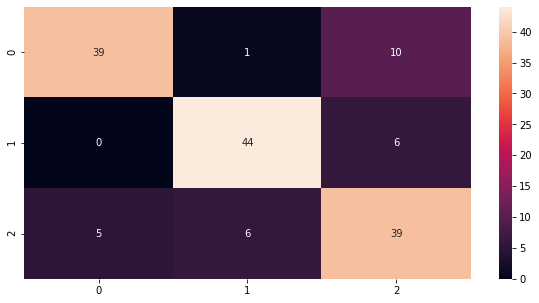

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matriz_confusao = confusion_matrix(labels, predict)
print(matriz_confusao)
plt.figure(figsize=(10,5))
sns.heatmap(matriz_confusao, annot=True)
# ['paper', 'rock', 'scissors']